In [1]:
from collab_filtering import NeuralCollabFiltering
import pandas as pd

## Pre-process

In [2]:
csv_path = '../dataset/spot_scid_slug_20200301-20200831.csv'
cols = ['summit_client_id', 'slug', 'time_on_page']
ncf = NeuralCollabFiltering(cols)
df = ncf.pre_processing(csv_path)

Number of summit_client_id: 364120, Number of slug: 11812, Min time_on_page: 1.0, Max time_on_page: 6478.0
Encodings data saved at /home/enunez/summit_recommender/neural_recommender/model/encoders_20200915.json
New training data saved at: /home/enunez/summit_recommender/neural_recommender/dataset/spot_scid_slug_20200301-20200831_reduced.csv
Pre-processing time 16.789029836654663 secs


## Split Data to Train and Test

In [3]:
ncf.train_test_split(df)

## Train

Epoch 1/5
8742/8742 [==============================] - 826s 94ms/step - loss: 0.1624 - val_loss: 0.1270
Epoch 2/5
8742/8742 [==============================] - 824s 94ms/step - loss: 0.1323 - val_loss: 0.1344
Epoch 3/5
8742/8742 [==============================] - 824s 94ms/step - loss: 0.1357 - val_loss: 0.1347
Epoch 4/5
8742/8742 [==============================] - 823s 94ms/step - loss: 0.1360 - val_loss: 0.1339
Epoch 5/5
8742/8742 [==============================] - 823s 94ms/step - loss: 0.1330 - val_loss: 0.1318


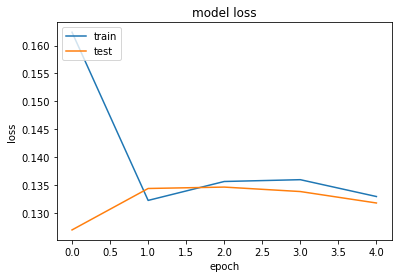

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /home/enunez/summit_recommender/neural_recommender/model/ncf_model_20200915/assets
Training time: 1.1451888991064496 hours.


In [4]:
num_users, num_items = df.user.unique().shape[0], df.item.unique().shape[0]
embedding_size = 200
batch_size = 128
epoch = 5

model = ncf.train(num_users=num_users, num_items=num_items, batch_size=batch_size, epochs=epoch)

# Reload Model

In [2]:
csv_path = 'dataset/spot_scid_slug_20200301-20200831_reduced.csv'
model_path = 'model/spot_ncf_model_20200915'
encodings_path = 'model/encoders_20200915.json'

cols = ['summit_client_id', 'slug', 'time_on_page']
ncf = NeuralCollabFiltering(cols)
ncf.load_model(csv_path, model_path, encodings_path)

In [3]:
recommendations = ncf.recommend(user_id='unknown', verbose=False)
recommendations

[]

In [4]:
ncf.recommend()